# Using Out-of-Sample Error to Evaluate New Attributes for Predicting Wine Quality

In [1]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# read data into iterable
x_list = []
labels = []
names = []
first_line = True
data_path = './data/winequality-red.csv'

with open(data_path) as data:
    
    for line in data:
        
        if first_line:
            names = line.strip().split(';')
            first_line = False
            
        else:
            # split on semicolon
            row = line.strip().split(';')
            
            # put labels in separate array
            labels.append(float(row[-1]))
            
            # remove label from row
            row.pop()
            
            # convert row to floats
            float_row = [float(num) for num in row]
            x_list.append(float_row)

In [3]:
# append square of last term (alcohol)

for i in range(len(x_list)):
    alc_elt = x_list[i][-1]
    vol_acid = x_list[i][1]
    
    temp = list(x_list[i])
    temp.append(alc_elt * alc_elt)
    temp.append(alc_elt * vol_acid)
    
    x_list[i] = list(temp)
    
# add new name to variable list
names[-1] = 'alco^2'
names.append('alco*vol_acid')

# Normalize colums in x and labels
# Note: be careful about normalization. Some penalized regression packages include it and some don't.

n_rows = len(x_list)
n_cols = len(x_list[0])

# calculate means and variances
x_means = []
x_sd = []

for i in range(n_cols):
    col = [x_list[j][i] for j in range(n_rows)]
    mean = sum(col)/n_rows
    x_means.append(mean)
    
    col_diff = [(x_list[j][i] - mean) for j in range(n_rows)]
    sum_sq = sum([col_diff[i] ** 2 for i in range(n_rows)])
    std_dev = sqrt(sum_sq/n_rows)
    x_sd.append(std_dev)
    
# Use calculated mean and standard deviation to normalize x_list
x_normalized = []

for i in range(n_rows):
    row_normalized = [(x_list[i][j] - x_means[j])/x_sd[j] for j in range(n_cols)]
    x_normalized.append(row_normalized)
    
# Normalize labels
mean_label = sum(labels)/n_rows
sd_label = sqrt(sum([(labels[i] - mean_label) * (labels[i] - mean_label) for i in range(n_rows)])/n_rows)
label_normalized = [(labels[i] - mean_label)/sd_label for i in range(n_rows)]

In [4]:
# Convert list of lists to np array for input to sklearn packages

# Unnormalized labels
y = np.array(labels)

# Normalized labels
# y = np.array(label_normalized)

# Unnormalized x
x = np.array(x_list)

# Normalized x
x = np.array(x_normalized)

# Call LassoCV from sklearn.linear_model
wine_model = LassoCV(cv=10).fit(x, y)

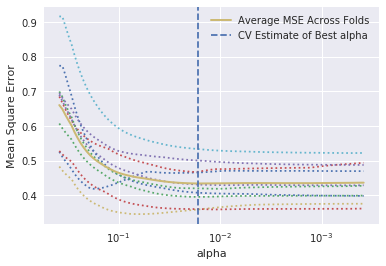

In [5]:
# Display results

plt.figure()
plt.plot(wine_model.alphas_, wine_model.mse_path_, ':')
plt.plot(wine_model.alphas_, wine_model.mse_path_.mean(axis=-1), label='Average MSE Across Folds', linewidth=2)
plt.axvline(wine_model.alpha_, linestyle='--', label='CV Estimate of Best alpha')
plt.semilogx()
plt.legend()
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('alpha')
plt.ylabel('Mean Square Error')
plt.axis('tight')
plt.show()

In [6]:
# print out the value of alpha that minimizes the CV-error
print(f'alpha Value That Minimizes CV Error: {wine_model.alpha_}')
print(f'Minimum MSE: {min(wine_model.mse_path_.mean(axis=-1))}')

alpha Value That Minimizes CV Error: 0.016640498998569852
Minimum MSE: 0.43452874043020195
